<a href="https://colab.research.google.com/github/2estherblaise-max/ECON3916-Statical-Machine-Learning./blob/main/Lab%208/In_class_note_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# **Case Study: Do experienced poker players change strategy after a big win/loss?**

In [ ]:
# SETUP
null_mean = 35.00       # H0: The "General Population" Average
sample_mean = 25.53     # The "Pro Player" Average
n_pro = 203             # Sample size
t_stat_target = -15.82  # Target t-statistic from slides
std_dev = 8.5

In [ ]:
# 2. SIMULATION
np.random.seed(41)
pop_size = 100000
population_data = np.random.normal(loc=null_mean, scale=std_dev, size=pop_size)

In [ ]:
# We generate 203 players with the lower mean (25.53) to represent the pros.
pro_sample = np.random.normal(loc=sample_mean, scale=std_dev, size=n_pro)

In [ ]:
# Test if our "Pro Sample" comes from a population with mean = 35
t_stat, p_val = stats.ttest_1samp(pro_sample, popmean=null_mean)

print("-" * 50)
print("HYPOTHESIS TEST RESULTS")
print("-" * 50)
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_val:.2e}")

if p_val < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

--------------------------------------------------
HYPOTHESIS TEST RESULTS
--------------------------------------------------
T-Statistic: -15.67
P-Value: 9.45e-37
Reject Null Hypothesis


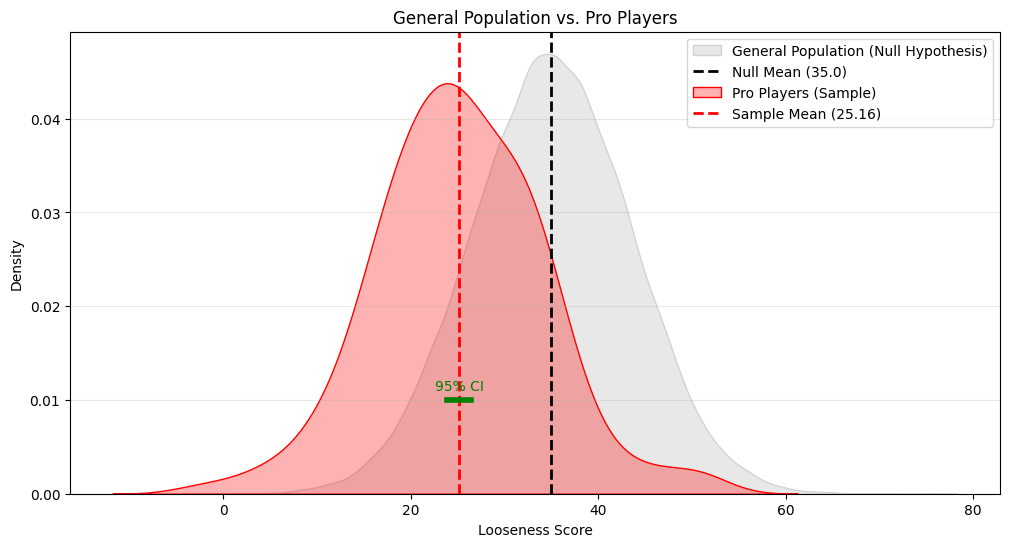

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the General Population (Grey)
sns.kdeplot(population_data, fill=True, color='lightgrey', label='General Population (Null Hypothesis)', alpha=0.5)
plt.axvline(null_mean, color='black', linestyle='--', linewidth=2, label=f'Null Mean ({null_mean})')

# Plot the Pro Sample (Red)
sns.kdeplot(pro_sample, fill=True, color='red', label='Pro Players (Sample)', alpha=0.3)
plt.axvline(pro_sample.mean(), color='red', linestyle='--', linewidth=2, label=f'Sample Mean ({pro_sample.mean():.2f})')

plt.title("General Population vs. Pro Players")
plt.xlabel("Looseness Score")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.plot([ci_low, ci_high], [0.01, 0.01], color='green', linewidth=4, label='95% Confidence Interval')
plt.text((ci_low+ci_high)/2, 0.011, "95% CI", color='green', ha='center')

plt.show()

In [ ]:
# Calculate the 95% CI for the mean of the Pro Players
ci_low, ci_high = stats.t.interval(confidence=0.95,
                                   df=len(pro_sample)-1,
                                   loc=np.mean(pro_sample),
                                   scale=stats.sem(pro_sample))

print(f"95% Confidence Interval: [{ci_low:.2f}, {ci_high:.2f}]")

95% Confidence Interval: [23.92, 26.40]


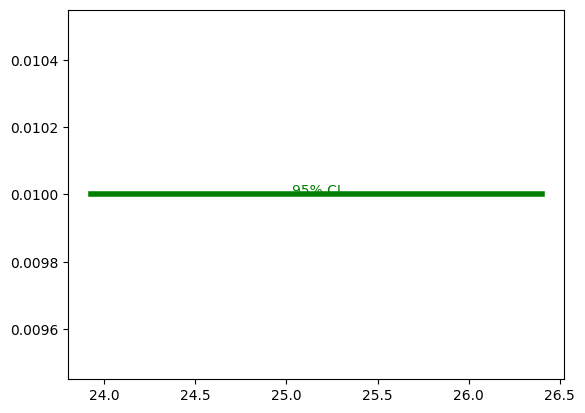

In [ ]:
plt.plot([ci_low, ci_high], [0.01, 0.01], color='green', linewidth=4, label='95% Confidence Interval')
plt.text((ci_low+ci_high)/2, 0.01, "95% CI", color='green', ha='center')
plt.show()

### 1. Hair Salon Prices (Matched-Pair Data)

This study compares the price of haircuts for men and women at the same salons.

In [ ]:
# Load Raw Transactions
df_salon = pd.read_csv('hair_salon_transactions.csv')
print(df_salon.head(10))

                  Salon  Gender  Price
0  Newbury Street Salon  Female  48.04
1        Fenway Barbers  Female  32.14
2      South End Studio    Male  43.93
3     Beacon Hill Salon  Female  48.55
4          Roxbury Cuts  Female  69.27
5            Floyd's 99    Male  37.79
6           Campus Cuts    Male  25.95
7  Newbury Street Salon  Female  50.24
8       Harvard Sq Hair  Female  31.97
9       Harvard Sq Hair    Male  19.88


In [ ]:
# 1. PIVOT / GROUP BY to get Average Price per Salon per Gender
# We want one row per Salon, with columns for 'Male' and 'Female' price
salon_summary = df_salon.groupby(['Salon', 'Gender'])['Price'].mean().unstack()
salon_summary['Difference'] = salon_summary['Female'] - salon_summary['Male']
print(salon_summary)

Gender                   Female       Male  Difference
Salon                                                 
Back Bay Hair         57.381031  42.304103   15.076928
Beacon Hill Salon     49.095982  48.834872    0.261110
Boston Barber         44.092692  33.879310   10.213382
Cambridge Cuts        52.908598  43.103030    9.805568
Campus Cuts           34.951789  30.097629    4.854161
Chinatown Barber      47.760673  43.175638    4.585035
Downtown Cuts         23.962182  21.113363    2.848819
Fenway Barbers        32.832396  29.846639    2.985757
Floyd's 99            39.889223  37.758365    2.130858
Great Clips           27.267281  26.876753    0.390527
Harvard Sq Hair       31.916077  21.977982    9.938095
Newbury Street Salon  48.151327  48.186154   -0.034827
Northeastern Salon    59.151200  58.795120    0.356080
Roxbury Cuts          67.063945  56.850000   10.213945
Seaport Studio        47.733855  43.269406    4.464449
Sola Salon            43.880636  39.937030    3.943607
South End 

In [ ]:
# Null Hypothesis (H0): Difference = 0
t_stat, p_val = stats.ttest_1samp(salon_summary['Difference'], popmean=0)

# 4. REPORT FINDINGS
print("Mean Difference in Price:", salon_summary['Difference'].mean())
print(f"Standard Deviation:" ,salon_summary['Difference'].std())
print(f"T-Statistic:", t_stat)
print(f"P-Value:", p_val)

if p_val < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Mean Difference in Price: 5.120497162189869
Standard Deviation: 4.395064668791583
T-Statistic: 5.210289538879262
P-Value: 4.981146514297368e-05
Reject Null Hypothesis


### 2. Immigrant Mothers & Daughters (Economic Status)

This study compares the economic percentile of immigrant mothers vs. their adult daughters. We have the 4,121 raw records.

In [ ]:
df = pd.read_csv('immigrant_mobility_study.csv')
print(df.head())

   Pair_ID  Mother_Year  Mother_Zip  Mother_Pct  Daughter_Year  Daughter_Zip  \
0        1         1970       95266        50.9           2000         94258   
1        2         1970       91548        39.5           2000         92740   
2        3         1970       94019        53.7           2000         90979   
3        4         1970       94205        69.4           2000         90518   
4        5         1970       91369        37.8           2000         94994   

   Daughter_Pct  
0          50.7  
1          67.6  
2          62.4  
3          80.7  
4          12.8  


In [ ]:
# 2. CALCULATE THE "ECONOMIC MOBILITY" (Difference)
# Matched Pair: Daughter - Mother
df['Mobility_Gain'] = df['Daughter_Pct'] - df['Mother_Pct']

In [ ]:
# 3. PERFORM THE T-TEST
# Null Hypothesis (H0): Mean Gain = 0 (No improvement)
t_stat, p_val = stats.ttest_1samp(df['Mobility_Gain'], popmean=0)

# 4. REPORT FINDINGS
print("Mean Economic Gain:", df['Mobility_Gain'].mean())
print(f"Standard Deviation:" ,df['Mobility_Gain'].std())
print(f"T-Statistic:", t_stat)
print(f"P-Value:", p_val)

if p_val < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Mean Economic Gain: 3.216986168405727
Standard Deviation: 23.654490896136203
T-Statistic: 8.730455348791505
P-Value: 3.626000170977397e-18
Reject Null Hypothesis


# **Do Admired Companies Win?**
### 3. Fortune Top 10 vs. S&P 500 (Stock Returns)

Each year, Fortune magazine lists America's most admired companies, highlighting the top 10. The question is whether the stocks of these top companies outperform the average stock.

In [ ]:
import yfinance as yf

In [ ]:
# 1. SETUP
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'BRK-B', 'JNJ', 'JPM', 'PG', 'KO', 'DIS']
market_ticker = '^GSPC' # S&P 500

# 2. DOWNLOAD DATA
# Added 'auto_adjust=False' to ensure 'Adj Close' column exists
start_date = '2004-01-01'
end_date = '2024-01-01'

stocks_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)
market_data = yf.download(market_ticker, start=start_date, end=end_date, auto_adjust=False)

# Select 'Adj Close' explicitly
stocks_df = stocks_data['Adj Close']
market_df = market_data['Adj Close']

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# 3. CALCULATE RETURNS
stock_returns = stocks_df.pct_change().dropna()
market_returns = market_df.pct_change().dropna()

In [ ]:
# 4. CREATE ADMIRED PORTFOLIO (Equal Weight)
portfolio_returns = stock_returns.mean(axis=1)

In [ ]:
# Align Data
aligned_data = pd.concat([portfolio_returns,market_returns],axis=1).dropna()
aligned_data.columns = ["Portfolio","Market"]
aligned_data

,Portfolio,Market
Date,,
2004-08-20,0.014718,0.006525
2004-08-23,-0.000094,-0.002431
2004-08-24,-0.003022,0.000465
2004-08-25,0.015619,0.008000
2004-08-26,0.007508,0.000118
...,...,...
2023-12-22,0.000835,0.001660
2023-12-26,0.001671,0.004232
2023-12-27,-0.000484,0.001430


In [ ]:
# 5. CALCULATE DIFFERENCE
aligned_data['Difference'] = aligned_data['Portfolio'] - aligned_data['Market']
aligned_data

,Portfolio,Market,Difference
Date,,,
2004-08-20,0.014718,0.006525,0.008193
2004-08-23,-0.000094,-0.002431,0.002337
2004-08-24,-0.003022,0.000465,-0.003488
2004-08-25,0.015619,0.008000,0.007619
2004-08-26,0.007508,0.000118,0.007390
...,...,...,...
2023-12-22,0.000835,0.001660,-0.000825
2023-12-26,0.001671,0.004232,-0.002561
2023-12-27,-0.000484,0.001430,-0.001915


In [ ]:
# 6. RUN T-TEST
# Null Hypothesis (H0): Mean Difference in Stock Return = 0 (No improvement)
t_stat, p_val = stats.ttest_1samp(aligned_data['Difference'], popmean=0)

# 4. REPORT FINDINGS
print("Mean Stock Return Differences:", aligned_data['Difference'].mean())
print(f"Standard Deviation:" ,aligned_data['Difference'].std())
print(f"T-Statistic:", t_stat)
print(f"P-Value:", p_val)

if p_val < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Mean Stock Return Differences: 0.00034311484465152173
Standard Deviation: 0.004215590610232508
T-Statistic: 5.6822958533668215
P-Value: 1.406251028531303e-08
Reject Null Hypothesis


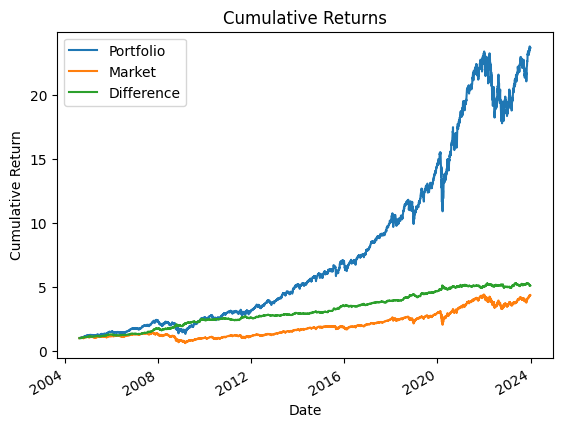

In [ ]:
# Simple Plot
(1 + aligned_data).cumprod().plot()
plt.title("Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.show()

# **The Theory: Do people with positive initials (A.C.E., V.I.P.) live longer than those with negative initials (P.I.G., D.I.E.)?**

In [ ]:
# Load Data
df = pd.read_csv("fateful_initials.csv")
df

,id,initials,category,birth_year,death_year,death_age,gender
0,1,WOW,Positive,1903,1969,65.3,Male
1,2,WIN,Positive,1947,1969,21.3,Male
2,3,JOY,Positive,1930,1987,56.3,Male
3,4,VIP,Positive,1920,1973,52.3,Male
4,5,ACE,Positive,1884,1981,96.3,Male
...,...,...,...,...,...,...,...
5995,5996,PTR,Control,1932,1983,51.0,Male
5996,5997,PTR,Control,1920,1988,68.0,Male
5997,5998,XYZ,Control,1937,1976,39.0,Male
5998,5999,ABC,Control,1919,1985,66.0,Male


In [ ]:
# 1. Calculate Averages
means = df.groupby('category')['death_age'].mean()
means

,death_age
category,
Control,65.4034
Negative,62.5080
Positive,69.8740


In [ ]:
# 2. Check the Difference (Positive vs Negative)
diff = means['Positive'] - means['Negative']
print(f"\nPositive vs Negative: {diff:.2f} years")


Positive vs Negative: 7.37 years


In [ ]:
# 3. Significance Test (T-Test)
# We compare the actual ages of 'Positive' people vs 'Negative' people
positive_ages = df[df['category'] == 'Positive']['death_age']
negative_ages = df[df['category'] == 'Negative']['death_age']

t_stat, p_val = stats.ttest_ind(positive_ages, negative_ages)

print(f"P-Value: {p_val:.5f}")
if p_val < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

P-Value: 0.00000
Reject Null Hypothesis


In [ ]:
print("-" * 50)
print("THE REALITY: Controlled for Birth Year")
print("-" * 50)
# 1. Group by Birth Year AND Category
grouped = df.groupby(['birth_year','category'])['death_age'].mean().unstack()

# 2. Calculate differences WITHIN each birth year
grouped['pos_diff'] = grouped["Positive"] - grouped["Negative"]

# Drop years with missing data
valid_diffs = grouped['pos_diff'].dropna()

# 3. Run T-Test on the DIFFERENCES
t_stat, p_val = stats.ttest_1samp(valid_diffs, popmean=0)

print(f"Controlled Difference: {valid_diffs.mean():.2f} years (Target: -0.83)")
print(f"T-Statistic: {t_stat:.2f} (Target: -1.84)")
print(f"P-Value: {p_val:.4f} (Target: ~0.06)")

print("-" * 50)
if p_val > 0.05:
    print("CONCLUSION: Not Significant (p > 0.05).")
    print("The positive effect disappeared!")
else:
    print("Conclusion: Significant.")

--------------------------------------------------
THE REALITY: Controlled for Birth Year
--------------------------------------------------
Controlled Difference: -0.93 years (Target: -0.83)
T-Statistic: -1.44 (Target: -1.84)
P-Value: 0.1547 (Target: ~0.06)
--------------------------------------------------
CONCLUSION: Not Significant (p > 0.05).
The positive effect disappeared!


In [ ]:
# The Millionarie Maker - Powerball Edition
def pick_powerball_numbers(num_tickets=1):
    for i in range(num_tickets):
        white_balls = np.random.choice(range(1, 70), size=5, replace=False)
        red_ball = np.random.randint(1, 27)
        print(f"Ticket #{i+1}: White Balls {white_balls} | Powerball: {red_ball}")

pick_powerball_numbers(5)

Ticket #1: White Balls [66 41 12 15 22] | Powerball: 8
Ticket #2: White Balls [49 53 31 15 38] | Powerball: 5
Ticket #3: White Balls [33 53  9 34 23] | Powerball: 14
Ticket #4: White Balls [49 65 22 55 44] | Powerball: 24
Ticket #5: White Balls [59 38 40 28  9] | Powerball: 3
